# Quantum Building Blocks
<hr></hr>

In order to understand some of the most relevant quantum protocols and algorithms, we must first introduce a few important quantum circuits that serve as building blocks in more advanced quantum routines. These include primitives such as: the preparation of important types of entangled states, namely [Bell states](https://en.wikipedia.org/wiki/Bell_state), [GHZ states](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state), and [W states](https://en.wikipedia.org/wiki/Hadamard_transform#Hadamard_transform_in_quantum_algorithms); the [Quantum Hadamard transform](https://en.wikipedia.org/wiki/Hadamard_transform); and [Phase kickback](https://en.wikipedia.org/wiki/Phase_kickback). Lastly, we will discuss the formalism behind the idea of quantum function evaluation, which allows us to instantiate certain classical functions into quantum circuits.

Other more advanced primitives, like the [Quantum Fourier Transform](https://en.wikipedia.org/wiki/Quantum_Fourier_transform), will be discussed in a separate chapter since they are more involved, requiring a more detailed description.

## 1. Preparation of (Some) Entangled States

### 1.1 Bell States

The [Bell states](https://en.wikipedia.org/wiki/Bell_state) correspond to an important set of $2$-qubit entangled states utilized in many quantum protocols such as [quantum teleportation](https://en.wikipedia.org/wiki/Quantum_teleportation) and [superdense coding](https://en.wikipedia.org/wiki/Superdense_coding). 

There are four Bell states, which correspond to equal superposition statevectors that, in the computational basis, are given by:

$$
\begin{aligned}
|\Phi^+ \rangle = \frac{1}{\sqrt{2}}\left(|00\rangle + |11\rangle \right), \quad \quad 
|\Phi^- \rangle = \frac{1}{\sqrt{2}}\left(|00\rangle - |11\rangle \right), 
\\
\\
|\Psi^+ \rangle = \frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle \right), \quad \quad 
|\Psi^- \rangle = \frac{1}{\sqrt{2}}\left(|01\rangle - |10\rangle \right).
\end{aligned}
$$

These states can be generated by taking the four computational basis states $|00\rangle, |01\rangle, |10\rangle, |11\rangle $, and evolving them through the following quantum circuit:

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator

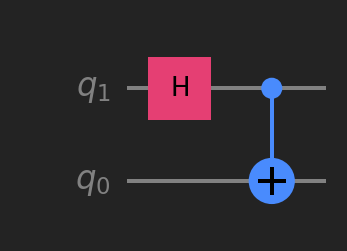

In [2]:
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.draw()

We can see the correspondence between each computational basis state, and the respective Bell state below:

In [3]:
q00 = Statevector.from_label('00') # Comp. basis state |00⟩
q01 = Statevector.from_label('01') # Comp. basis state |01⟩
q10 = Statevector.from_label('10') # Comp. basis state |10⟩
q11 = Statevector.from_label('11') # Comp. basis state |11⟩

Φp = q00.evolve(qc)                # Bell basis state |Φ⁺⟩
Ψp = q01.evolve(qc)                # Bell basis state |Ψ⁺⟩
Φm = q10.evolve(qc)                # Bell basis state |Φ⁻⟩
Ψm = q11.evolve(qc)                # Bell basis state |Ψ⁻⟩

In [4]:
print(f'state |00⟩ evolves to state: ')
display(Φp.draw('latex',prefix='|\\Phi^+ \\rangle = '))

print(f'state |01⟩ evolves to state: ')
display(Ψp.draw('latex',prefix='|\\Psi^+ \\rangle = '))

print(f'state |10⟩ evolves to state: ')
display(Φm.draw('latex',prefix='|\\Phi^- \\rangle = '))

print(f'state |11⟩ evolves to state: ')
display(Ψm.draw('latex',prefix='|\\Psi^- \\rangle = '))

state |00⟩ evolves to state: 


<IPython.core.display.Latex object>

state |01⟩ evolves to state: 


<IPython.core.display.Latex object>

state |10⟩ evolves to state: 


<IPython.core.display.Latex object>

state |11⟩ evolves to state: 


<IPython.core.display.Latex object>

We can also prepare these four states by using the same circuit we used above, but now initializing the input state as $|00\rangle$ and applying the following gates accordingly:

1. Apply no other gates to generate $|\Phi^+\rangle$.
2. Apply a $Z$ gate to either of the qubits to generate $|\Phi^-\rangle$.
3. Apply an $X$ gate to either of the qubits to generate $|\Psi^+\rangle$.
4. Apply both a $Z$ and an $X$ gate to either of the qubits to generate $|\Psi^-\rangle$.

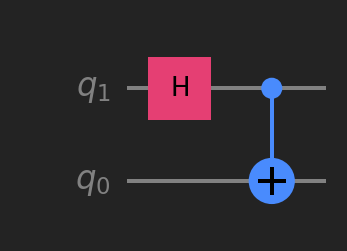

<IPython.core.display.Latex object>

In [5]:
# Circuit for |Φ⁺⟩
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
display(qc.draw())

Statevector(qc).draw('latex',prefix='|\\Phi^+ \\rangle = ')

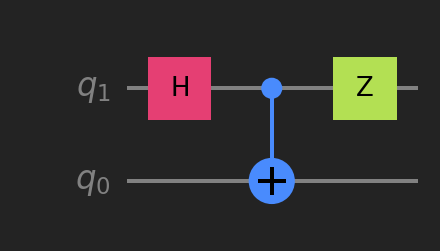

<IPython.core.display.Latex object>

In [6]:
# Circuit for |Φ⁻⟩
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.z(1)
display(qc.draw())

Statevector(qc).draw('latex',prefix='|\\Phi^- \\rangle = ')

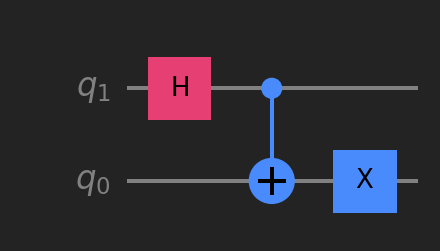

<IPython.core.display.Latex object>

In [7]:
# Circuit for |Ψ⁺⟩
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.x(0)
display(qc.draw())

Statevector(qc).draw('latex',prefix='|\\Psi^+ \\rangle = ')

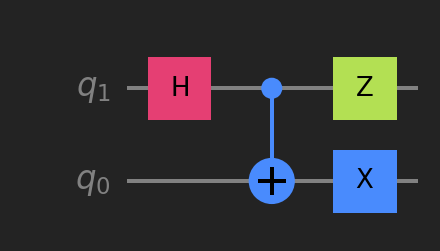

<IPython.core.display.Latex object>

In [8]:
# Circuit for |Ψ⁻⟩
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1,0)
qc.x(0)
qc.z(1)
display(qc.draw())

Statevector(qc).draw('latex',prefix='|\\Psi^- \\rangle = ')

A good exercise is to manually verify why applying these sequences of gates generate the four Bell states.

### 1.2 GHZ States

[Greenberger–Horne–Zeilinger (GHZ) states](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state) are a generalization of the $|\Phi^+ \rangle$ Bell state for 3 or more qubits. In other words, these are equal superpositions composed of the all-zeros and all-ones states. For example, for the specific case of 3 qubits, this state is given by:

$$ |\Omega\rangle = \frac{1}{\sqrt{2}}\left(|000\rangle + |111\rangle \right) .$$

But, more generally, for $n$ qubits:

$$ |\Omega_n\rangle = \frac{1}{\sqrt{2}}\left(|0\rangle^{\otimes n} + |1\rangle^{\otimes n} \right) .$$

GHZ states are of critical importance in the generalized versions of superdense coding and quantum teleportation, and play a crucial role in the implementation of [quantum error correction](https://en.wikipedia.org/wiki/Quantum_error_correction).

There are several ways in which these states can be created using quantum circuits. The simplest and perhaps most intuitive way, is by placing one of the qubits in equal superposition, and then entangling the remaining qubits (initialized at $|0\rangle$) by using $CX$ gates as follows:

In [9]:
def ghz_cir_a(n):
    # create quantum circuit with n qubits
    qc_ghz = QuantumCircuit(n)
    
    # place most significant qubit in equal superposition
    qc_ghz.h(n-1)
    
    # apply cx gates between superposition qubit and remaning qubits
    for i in reversed(range(n-1)):
        qc_ghz.cx(n-1,i)
        
    return qc_ghz

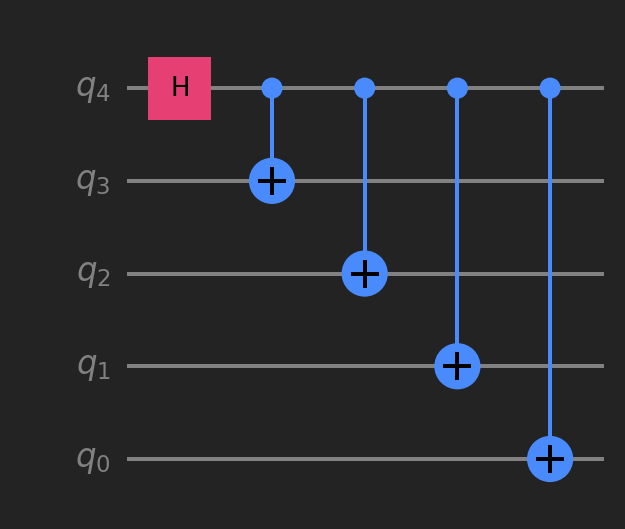

<IPython.core.display.Latex object>

In [10]:
# Create GHZ circuit for n qubits
n = 5
qc = ghz_cir_a(n)
display(qc.draw())

# Display n-qubit GHZ state
Statevector(qc).draw('latex', prefix=f'|\\Omega _{n}\\rangle = ')

One of the issues with this circuit is that, in many quantum hardware architectures, not all qubits are physically connected to each other. Therefore, applying the $CX$ gates between non-adjacent qubits is not possible. For example, if a quantum chip only allows for "nearest neighbor" connectivity, qubit $q_4$ in the circuit below would only be directly connected to $q_3$, so it will require adding extra $\text{SWAP}$ gates to allow the entanglement between the remaining qubits. And of course, these extra gates add noise, which is not desirable. Alternatively, GHZ states can also be generated by gradually entangling each successive pair of qubits:

In [11]:
def ghz_cir_b(n):
    # create quantum circuit with n qubits
    qc_ghz = QuantumCircuit(n)
    
    # place most significant qubit in equal superposition
    qc_ghz.h(n-1)
    
    # apply cx gates between successive pairs of qubits
    for i in reversed(range(n-1)):
        qc_ghz.cx(i+1,i)
        
    return qc_ghz

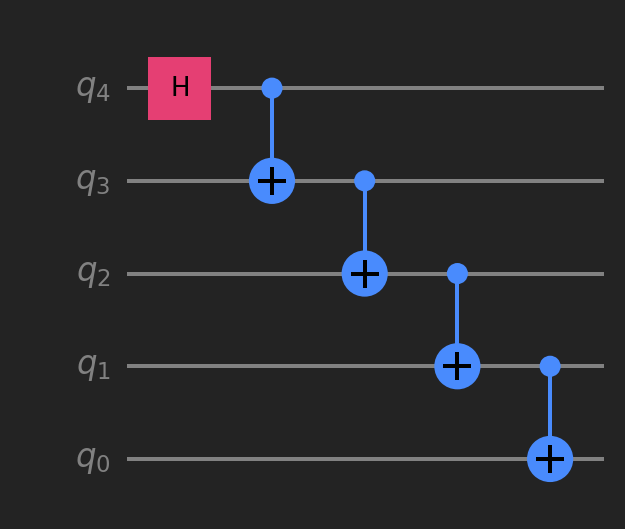

<IPython.core.display.Latex object>

In [12]:
# Create GHZ circuit for n qubits
n = 5
qc = ghz_cir_b(n)
display(qc.draw())

# Display n-qubit GHZ state
Statevector(qc).draw('latex', prefix=f'|\\Omega _{n}\\rangle = ')

Now, the problem with this approach is that, since each $CX$ gate needs to be applied sequentially, the total circuit depth for $n$ qubits is equal to $n+1$. In other words, no $CX$ gates are being applied in parallel. This is problematic when the number of qubits is large because, the most significant qubits are being left idle for a long period of time, which leads to errors in the computation. 

It is therefore desirable to implement GHZ circuits where the nearest-neighbor connectivity is preserved, but the depth of the circuit is reduced. The example below cuts the depth to $n/2 + 2$, but there are more clever techniques where, for certain connectivity maps, the total number of $CX$ gates can be reduced to be order $\log_2(n)$.

In [13]:
def ghz_cir_c(n):
    # create quantum circuit with n qubits
    qb_mid = n//2
    qc_ghz = QuantumCircuit(n)
    
    # place most significant qubit in equal superposition
    qc_ghz.h(qb_mid)
    
    # apply cx gates between successive pairs of qubits
    for i in reversed(range(qb_mid)):
        qc_ghz.cx(i+1,i)
    
    for i in range(qb_mid,n-1):
        qc_ghz.cx(i,i+1)
    
    return qc_ghz

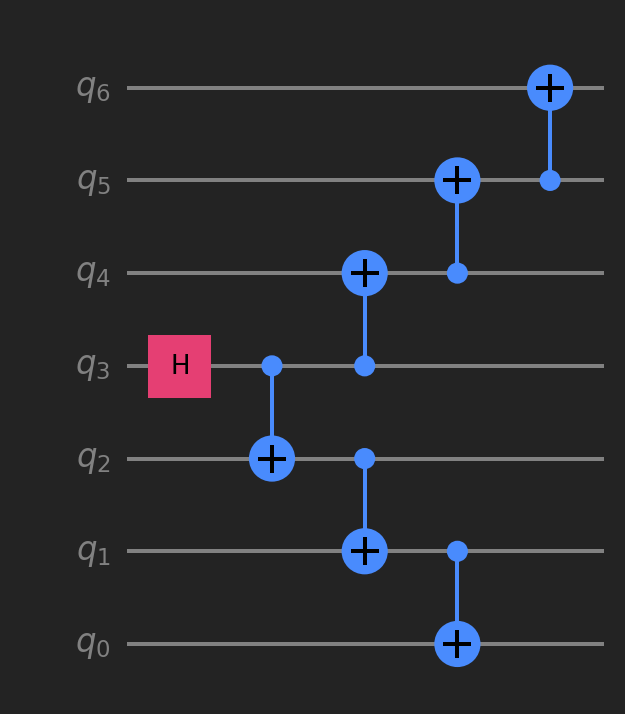

<IPython.core.display.Latex object>

In [14]:
# Create GHZ circuit for n qubits
n = 7
qc = ghz_cir_c(n)
display(qc.draw())

# Display n-qubit GHZ state
Statevector(qc).draw('latex', prefix=f'|\\Omega _{n}\\rangle = ')

### 1.3 W States

Just like GHZ states can be seen as a generalization of the $|\Phi^+\rangle$ Bell state, W states can be considered to be a generalization of the $|\Psi^+\rangle$ Bell state for 3 or more qubits, where there is only one $1$ in each state that composes the superposition. So, for the particular case of 3 qubits we have:

$$ |\text{W}\rangle = \frac{1}{\sqrt{3}}\left(|001\rangle + |010\rangle + |100\rangle \right) .$$

But, in general, for $n$ qubits:

$$ |\text{W}_n\rangle = \frac{1}{\sqrt{n}}\sum_{j=0}^{n-1} |2^j\rangle ,$$

where we use the integer $2^j$ inside the ket to denote the binary value for that particular number. So, for example, for $n = 5$, we have:

$$ 
\begin{aligned}
|\text{W}_5\rangle &= \frac{1}{\sqrt{5}}\left(|1\rangle + |2\rangle + |4\rangle + |8\rangle + |16\rangle \right) 
\\
\\
|\text{W}_5\rangle &= \frac{1}{\sqrt{5}}\left(|00001\rangle + |00010\rangle + |00100\rangle + |01000\rangle + |10000\rangle \right) 
\end{aligned}
$$

W states play a critical role in quantum information theory, quantum communication, and other applications that require [one-hot encoding](https://en.wikipedia.org/wiki/One-hot).

The circuit to generate these states is significantly more involved than that of GHZ states, so I provide a detailed description on how to do this in a separate [post](https://nbviewer.org/github/diemilio/quantum-playground/blob/main/w-states/w-states.ipynb). However, for convenience, the code to generate these circuits is provided below:

In [15]:
def w_cir(n):
    
    prob_amp = np.sqrt(1/n)          # probability amplitude
    rot_ang = 2*np.arccos(prob_amp)  # initial rotation angle
    
    # create quantum circuit with n qubits
    qc_w = QuantumCircuit(n) 
    
    # probability redistribution
    qc_w.ry(rot_ang,n-1)
    for i in range(n-1,1,-1):
        comp_amp = np.sqrt(i/n)
        rot_ang = 2*np.arccos(prob_amp/(comp_amp))
        qc_w.cry(rot_ang,i,i-1)
    
    # state reshuffling
    for i in range(1, n):
        qc_w.cx(i,i-1)
    
    qc_w.x(n-1)
    
    return qc_w

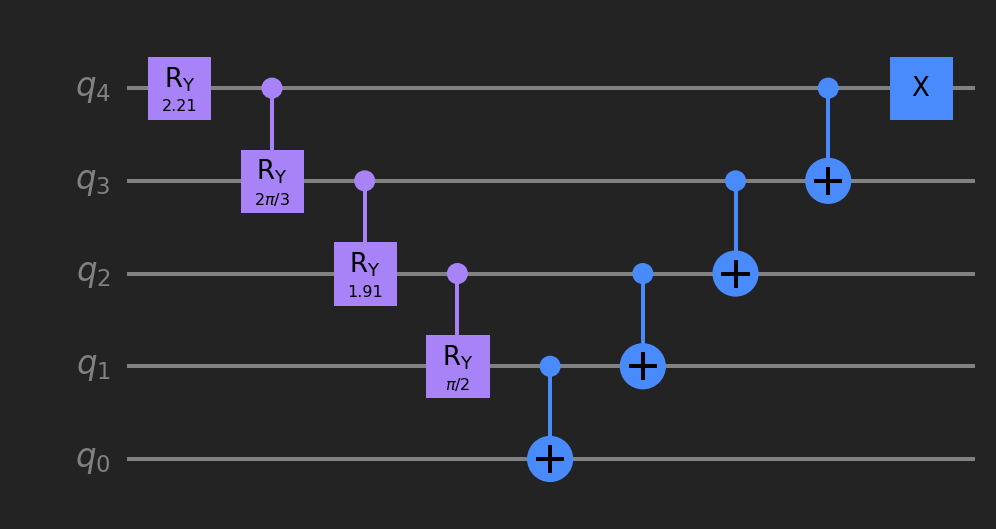

<IPython.core.display.Latex object>

In [16]:
# Create W circuit for n qubits
n = 5
qc = w_cir(n)
display(qc.draw())

# Display n-qubit W state
Statevector(qc).draw('latex', prefix=f'|\\text W_{n} \\rangle = ')

Similar to the preparation of GHZ states, there are also a methods to generate W states with circuit lower depths. [[Cruz18]](https://arxiv.org/pdf/1807.05572) provides some insight into how both GHZ and W state generation can be accomplished using circuits with number of gates in order $\log_2(n)$.

## 2. The Quantum Hadamard Transform



The quantum [Hadamard transform](https://en.wikipedia.org/wiki/Hadamard_transform) (QHT) is one of the most important building blocks in quantum computing as it shows up in a wide range of quantum algorithms. Its definition is rather simple, but the nomenclature used to describe how it acts on a general quantum state is worth introducing because it is used rather extensively.

The QHT is nothing other than the Hadamard gate $H$ being individually applied to $n$ qubits:

$$ \text{QHT}_n = H^{\otimes n} .$$

Recalling that the matrix for Hadamard operation is given by:

$$ H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix} ,$$

the QHT then results in matrix with $N = 2^n$ rows/columns, composed of alternating sequences of $1$s an $-1$s with a normalization factor, which is determined by the number of qubits. To see this, we can use the $2$-qubit case as an example:

$$ 
\begin{aligned}
\text{QHT}_2 &= H \otimes H = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix}
\\
\\
\text{QHT}_2 &= \frac{1}{\sqrt{4}} \begin{bmatrix} 1 \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix}  & \phantom{-}1 \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix}  \\ 1 \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix}  & -1 \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix} \end{bmatrix}
\\
\\
\text{QHT}_2 &= \frac{1}{\sqrt{4}} \begin{bmatrix} 1 & \phantom{-}1 & \phantom{-}1 & \phantom{-}1 \\
                                            1 & -1 & \phantom{-}1 & -1 \\
                                            1 & \phantom{-}1 & -1 & -1 \\
                                            1 & -1 & -1 & \phantom{-}1 \end{bmatrix} .
\end{aligned}
$$


More generally, the matrix associated with the QHT is of the form:

$$ 
\text{QHT}_n = \frac{1}{\sqrt{N}} \begin{bmatrix} h_{0,0} & h_{0,1} & \dots & h_{0,(N-1)} \\
                                            h_{1,0} & h_{1,1} & \dots & h_{1,(N-1)} \\
                                            \vdots & \vdots  & \ddots & \vdots \\
                                            h_{(N-1),0} & h_{(N-1),1} & \dots & h_{(N-1),(N-1)} \end{bmatrix}
$$

where the element in row $i$ and column $j$ can be computed as:

$$ h_{i,j} = (-1)^{i \cdot j}. $$

Here, $i \cdot j$ represents the dot product of the binary representations of $i$ and $j$. So, for example, for $n = 3$ qubits, The QHT will be a matrix of size $2^3 \times 2^3 = 8 \times 8$. And to calculate the matrix entry in, let's say, row $i = 2$ (which is $010$ in binary) and column $j = 6$ ($110$ in binary), we compute:

$$
\begin{aligned}
i \cdot j  &= 010 \cdot 110
\\
i \cdot j  &= 0 \times 1 + 1 \times 1 + 0 \times 0
\\
i \cdot j & = 1,
\end{aligned}
$$

which results in the following matrix element:

$$h_{2,6} = (-1)^{1} = -1 .$$

We can also use Qiskit to implement the circuit and unitary matrix for the QHT as follows:

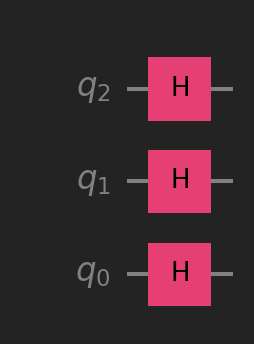

<IPython.core.display.Latex object>

In [17]:
# Create QHT circuit for n qubits
n = 3

qc = QuantumCircuit(n)
qc.h(range(n))
display(qc.draw())

# Display n-qubit QHT matrix
QHT = Operator(qc)
QHT.draw('latex', prefix=f'\\text Q \\text H \\text T_{n} = ')

An important expression that comes in handy when analyzing quantum algorithms is that of the output state $|y\rangle$ of the QHT given an arbitrary input state $|x\rangle$:

$$ |y\rangle = \text{QHT} |x\rangle .$$

An easy way to find $|y\rangle$, is by first assuming $|x\rangle$ is one of the computational basis states $\{|0\rangle, |1\rangle \}^{\otimes n}$. For example, if $|x\rangle$ is the all-zeros state $|0 \dots 00\rangle$ (which is the first basis state), then $|y\rangle$ will be a statevector whose entries correspond to the first column of the QHT matrix; if $|x\rangle$ is state $|0 \dots 01\rangle$ (the second basis state), then $|y\rangle$ will correspond to the QHT's second column, and so on. So, in general, if the input to the QHT is the $j^{\text{th}}$ basis state $|j\rangle$, the output state $|y_j\rangle$ corresponds to the $j^{\text{th}}$ column of the QHT matrix.

Again, if we take as example $|x\rangle$ being the all-zeros state, we have:

$$ 
\begin{aligned}
|y_0\rangle &= \text{QHT} \, |0 \dots 00 \rangle
\\
\\
|y_0\rangle &= \frac{1}{\sqrt{N}} \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \end{bmatrix} 
\\
\\
|y_0\rangle &= \frac{1}{\sqrt{N}} \left( \; \begin{bmatrix} 1 \\ 0 \\ \vdots \\ 0 \end{bmatrix} + 
                                          \begin{bmatrix} 0 \\ 1 \\ \vdots \\ 0 \end{bmatrix} + \dots +
                                          \begin{bmatrix} 0 \\ 0 \\ \vdots \\ 1 \end{bmatrix} \; \right)
\\
\\
|y_0\rangle &= \frac{1}{\sqrt{N}} \sum_{i = 0}^{N - 1} |i\rangle .
\end{aligned}
$$


Now, recalling that each matrix entry of the QHT is given by $ h_{i,j} = (-1)^{i \cdot j} $, we can find the output state $|y_j\rangle$, given the input $|x\rangle = |j\rangle$, by using the expression we found above for $|y_0\rangle$, but also including the corresponding matrix entry coefficients in the summation:

$$ 
\begin{aligned}
|y_j\rangle &= \text{QHT} \, |j\rangle = \frac{1}{\sqrt{N}} \sum_{i = 0}^{N - 1} h_{i,j} |i\rangle
\\
\\
|y_j\rangle &= \frac{1}{\sqrt{N}} \sum_{i = 0}^{N - 1} (-1)^{i \cdot j} |i\rangle .
\end{aligned} 
$$

Finally, to obtain the general equation for an arbitrary input $|x\rangle$, all we need to recall is that, any state can be expressed as a linear superposition of the computational basis states:

$$|x\rangle = \sum_{j=0}^{N-1} \alpha_j |j\rangle .$$

So, by linearity:

$$ 
\begin{aligned}
|y\rangle &= \text{QHT} \, |x\rangle = \sum_{j=0}^{N-1} \alpha_j \, \text{QHT} \, |j\rangle 
\\
\\
|y\rangle &= \sum_{j=0}^{N-1} \alpha_j |y_j\rangle, 
\end{aligned}
$$

which, after replacing $|y_j\rangle$ with the expression we found above, results in:

$$ 
\begin{split}
\boxed{|y\rangle = \sum_{i = 0}^{N - 1} \left( \frac{1}{\sqrt{N}} \sum_{j = 0}^{N - 1} (-1)^{i \cdot j} \alpha_j \right) |i\rangle}
\end{split}
$$

The terms inside the parenthesis correspond to each of the probability amplitudes $\beta_i$ of the output state; i.e.:

$$ |y\rangle = \sum_{i=0}^{N-1} \beta_i |i\rangle, \quad \text{where:} \; \beta_i = \frac{1}{\sqrt{N}} \sum_{j = 0}^{N - 1} (-1)^{i \cdot j} \alpha_j .$$

Let's now use Qiskit to compute the QHT of, for example, a $3$-qubit W state:

In [18]:
# Generate n-qubit W state
n = 3
QHT = Operator.from_label('H'*n)
W = Statevector(w_cir(n))
W.draw('latex', prefix=f'|\\text W_{n}\\rangle = ')

<IPython.core.display.Latex object>

In [19]:
# Compute QHT of W state using Qiskit
y = W.evolve(QHT)
y.draw('latex', prefix=f'\\text Q \\text H \\text T | \\text W_{n}\\rangle = ')

<IPython.core.display.Latex object>

Qiskit is very convinient; however, it is a good exercise to code a function to compute the QHT in order to verify that the expressions we derived above do indeed match what we get from Qiskit:

In [20]:
# Function that computes the QHT of an input Statevector sv
def qht_func(sv):
    
    βs = []                                       # List to store each βi                                    
    
    for i in range(len(sv)):
        i_str = np.binary_repr(i,n)               # Convert i to binary str
        i_lst = [int(bit,2) for bit in i_str]     # Store bits of i in a list
        
        β_temp = 0
        for j, α in enumerate(sv.data):
            j_str = np.binary_repr(j,n)           # Convert j to binary str
            j_lst = [int(bit,2) for bit in j_str] # Store bits of j in a list
            ij_dot = np.dot(i_lst,j_lst)          # perform inner product of i and j
            β_temp += (-1)**ij_dot * α            # sum over j
        
        β_temp *= 1/np.sqrt(2**n)                 # multiply βi by normalization factor
        βs.append(β_temp)
    
    return Statevector(βs)

In [21]:
# Computer QHT of W state using our own function (should match Qiskit's result)
y = qht_func(W)
y.draw('latex', prefix=f'\\text Q \\text H \\text T | \\text W_{n}\\rangle = ')

<IPython.core.display.Latex object>

## 3. Phase Kickback

Even though most popular descriptions of quantum computing cite **superposition** and **entanglement** as the key ingredients to achieving computational speedups, the reality is that the [phase kickback](https://en.wikipedia.org/wiki/Phase_kickback) effect is equally important. Phase kickback is so critical that it shows up, in one way or an other, in every single quantum algorithm with a proven speedup. In this section we will cover the fundamentals of phase kickback, which will allow us to understand in detail how is it that this phenomenon makes quantum routines advantageous over their classical counterparts.

### 3.1 Eigenvalues and Eigenvectors

To understand phase kickback, we need to talk about the [eigenvalues and eigenvectors](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of a matrix. This might sound a bit intimidating, but the good thing is that these concepts have a very intuitive geometrical interpretation when discussed in the context of a single qubit system. And from there, it should be easy to generalize them to multi-qubit systems.

Let's recall that single qubit gates, which are described by unitary matrices, can be viewed as qubit rotations in the Bloch sphere. For example, the $X$ gate rotates a qubit's Bloch vector by angle of $\pi$ ($180°$) about the $x$ axis. We can easily see this when the $X$ gate is applied to state $|0\rangle$, which then results in state $|1\rangle$:

Qubit before X gate is applied:


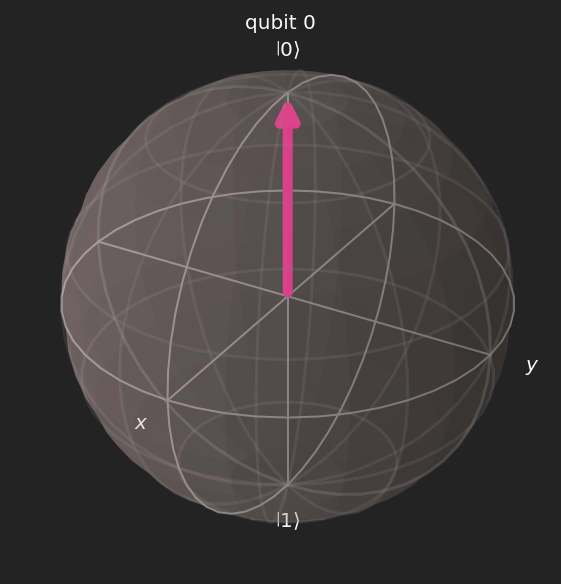

In [22]:
q = Statevector.from_label('0')
print('Qubit before X gate is applied:')
q.draw('bloch')

Qubit after X gate is applied:


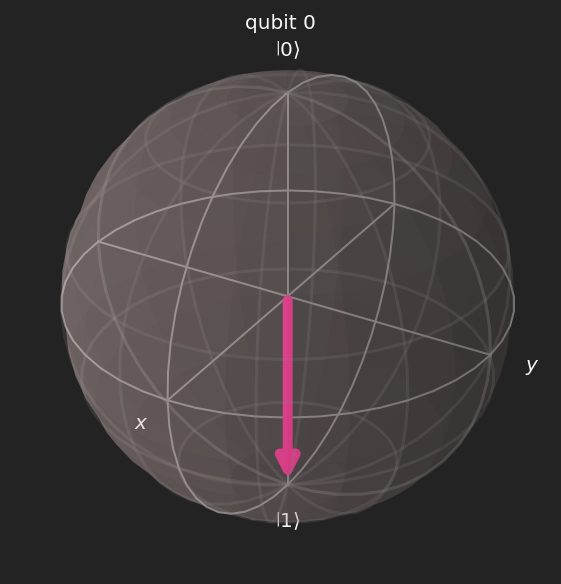

In [23]:
X = Operator.from_label('X')
q = q.evolve(X)
print('Qubit after X gate is applied:')
q.draw('bloch')

But what happens if we apply an $X$ gate to a qubit whose Bloch vector is pointing in a direction **parallel** to the $x$ axis? Intuition tells us that the qubit will rotate on itself, and therefore remain unchanged. That is indeed precisely what happens to statevector $|+\rangle$:

Qubit before X gate is applied:


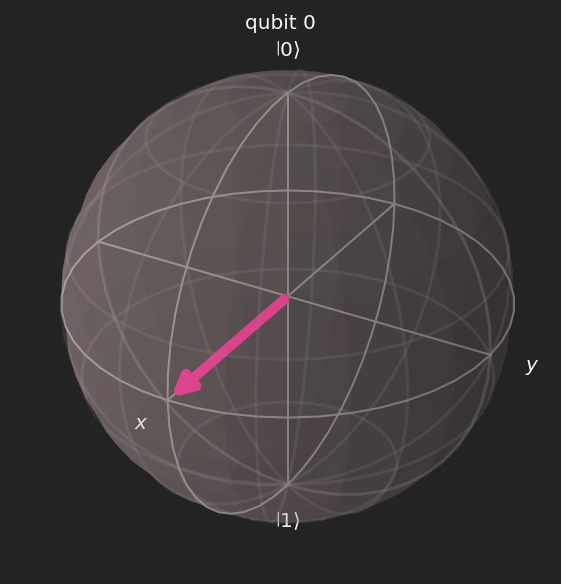

In [24]:
p = Statevector.from_label('+')
print('Qubit before X gate is applied:')
p.draw('bloch')

Qubit after X gate is applied:


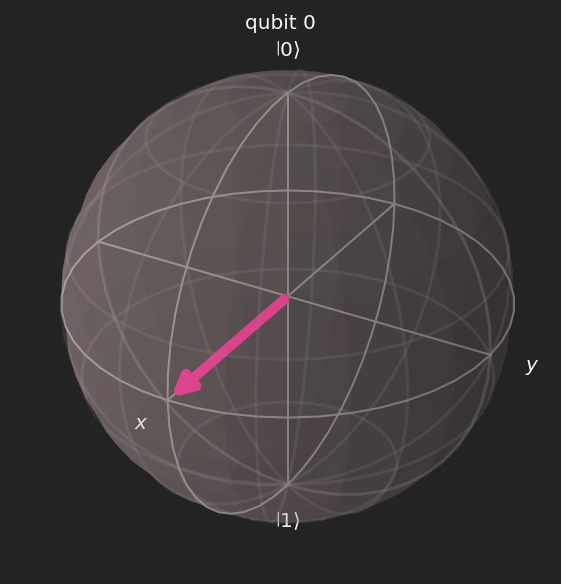

In [25]:
p = p.evolve(X)
print('Qubit after X gate is applied:')
p.draw('bloch')

We then say that state $|+\rangle$ is an eigenvector of the $X$ matrix. The other eigenvector of the $X$ matrix is state $|-\rangle$ since it is the only other vector that lies along the $x$ axis, and will therefore remain unchanged if an $X$ gate is applied to it. 

So, more generally, the <span style="color:#a883f7"><strong>eigenvectors</strong></span> of a unitary matrix $U$ are those special vectors whose direction remains unchanged when $U$ acts on them.

Eigenvectors then satisfy what is known as the <span style="color:#a883f7"><strong>eigenvalue equation</strong></span>. For a unitary $U$ with an eigenvector $|u\rangle$, the eigenvalue equation is given by:

$$ U|u\rangle = \lambda |u\rangle, $$

where $\lambda$ is the <span style="color:#a883f7"><strong>eigenvalue</strong></span> associated with the eigenvector $|u\rangle$.

In the case of some non-unitary matrices (like [spatial transformation matrices](https://en.wikipedia.org/wiki/Transformation_matrix)), the eigenvalue $\lambda$ can be interpreted as the factor by which an eigenvector gets scaled (stretched or compressed) by the matrix of interest while maintaining the vector's direction. However, since unitary matrices preserve the length of vectors (i.e., statevectors evolved through unitaries remain normalized), $\lambda$ is always a complex number of modulus equal to $1$:

$$|\lambda| = 1 .$$

In other words, the eigenvalues of unitary matrices **do not** scale the length of their corresponding eigenvectors.

Now, since it is only the modulus of $\lambda$ that must be equal to $1$, there is really no restriction on what the **phase** of $\lambda$  must be. As a matter of fact, this phase is determined to the unitary $U$ and the corresponding eigenvector $|u\rangle$. To see what we mean by this, let's apply $X$ to each of its eigenvectors and find their corresponding eigenvalues. So, starting with eigenvector $|+\rangle$:

$$
\begin{aligned}
X |+\rangle &= \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix}
\\
\\
X |+\rangle &= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ 1 \end{bmatrix}
\\
\\
X |+\rangle &= |+\rangle .
\end{aligned}
$$

From this, we can see that applying the $X$ gate to $|+\rangle$, results in exactly state $|+\rangle$, which means its corresponding eigenvalue is $\lambda_+ = 1 .$ Now, for state $|-\rangle$ we have:

$$
\begin{aligned}
X |-\rangle &= \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \frac{1}{\sqrt{2}}\begin{bmatrix} \phantom{-}1 \\ -1 \end{bmatrix}
\\
\\
X |-\rangle &= \frac{1}{\sqrt{2}} \begin{bmatrix} -1 \\ \phantom{-}1 \end{bmatrix}
\\
\\
X |-\rangle &= -1 |-\rangle .
\end{aligned}
$$

In this case, we get state $|-\rangle$ pre-multiplied by $-1$, which means that its eigenvalue is $\lambda_- = -1 .$ This is consistent with what we have described before because $\lambda_-$ does indeed have modulus equal to $1$. Therefore, for the $X$ matrix, we have the following set of eigenvalue/eigenvector pairs:

$$ \big \{\big(\lambda, |u\rangle \big)\big \}_{U=X} = \big \{ \big(1,  |+\rangle \big), \big( {-1}, |-\rangle \big) \big \} $$

Now, since every complex number can be represented as $r e^{i\varphi}$, we have that the eigenvalues of unitary matrices (for which $r = |\lambda| = 1$) can always be expressed as:

$$ \lambda = e^{i\varphi}. $$

We can then rewrite the eigenvalue equation for unitary matrices as:

$$ U|u\rangle = e^{i\varphi} |u\rangle. $$

This reveals that, when a unitary $U$ acts on any of its eigenvectors $|u\rangle$, the result is the same eigenvector pre-multiplied by a **global phase factor**, which as we discussed before, it is not something we can directly measure.

In the specific case of the $X$ matrix and its eigenvector $|-\rangle$, we see that the eigenvector acquires a global phase of $\pi$ (since $\lambda_- = e^{i \pi} = -1$), but it is not uncommon to see the misnomer "*phase of $-1$*" being used.

At first glance, it seems that applying a unitary matrix to one of its eigenvectors is a useless operation since it only has the effect of adding a global phase to the state, which is an unmeasurable quantity. But this is where phase kickback comes in: by adding an extra qubit that controls if the unitary $U$ is applied or not to an eigenvector $|u\rangle$, one can indirectly infer the corresponding eigenvalue $\lambda$. Let's see how this work.

### 3.2 Kickback in Action

Let us start by considering as an example the controlled-version of an $X$ gate (i.e., a $CX$ gate). 

If we initialize the control qubit of a $CX$ gate to state $|0\rangle$, and the target qubit to state $|-\rangle$, which as we saw before, is an eigenvector of the $X$ matrix, the output state will be the same as the input since the $X$ gate will not be activated:

$$ |0\rangle \otimes |-\rangle \xrightarrow{\; CX \;} |0\rangle \otimes |-\rangle .$$

On the other had, if we now initialize the control qubit to state $|1\rangle$, the $CX$ will be applied to the target state $|-\rangle$, causing it to get premultiplied by its eigenvalue of $-1$:

$$ |1\rangle \otimes |-\rangle \xrightarrow{\; CX \;} |1\rangle \otimes -1 |-\rangle .$$

Since $-1$ is simply a constant factor, we can rewrite the output state as $- |1\rangle \otimes |-\rangle,$ which can be interpreted as the $CX$ operation adding an overall global phase of $-1$ to the total state. Let's see this in Qiskit:

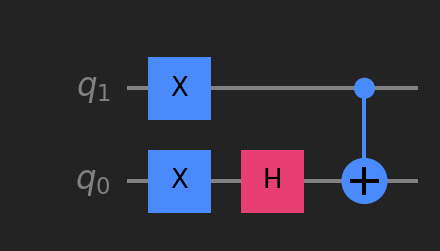

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [26]:
# Circuit to apply |1-⟩ to CX gate
qc = QuantumCircuit(2)
qc.x([0,1])
qc.h(0)
ψ_in = Statevector(qc)
qc.cx(1,0)
ψ_out = Statevector(qc)
display(qc.draw())

# Statevector before CX
display(ψ_in.draw('latex',prefix='|\\psi \\rangle_{\\text{in}} = '))

# Statevector after CX
ψ_out.draw('latex',prefix='|\\psi \\rangle_{\\text{out}} = ')

So far, this all seems very unexciting. All we've managed to do is add a global phase to our state, which is not any different than what we had for the single-gate case. However, let us now consider the scenario in which we initialize the control qubit in an equal superpostion of state $|0\rangle$ and state $|1\rangle$:

$$ \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle\right) \otimes |-\rangle \xrightarrow{\; CX \;}  \frac{1}{\sqrt{2}}\left(|0\rangle \otimes |-\rangle - |1\rangle \otimes |-\rangle \right) .$$

Notice how the phase factor of $-1$ now shows up as a relative phase of the overall state. Also, since the eigenvector $|-\rangle$ is a common factor in both terms of the superposition, it can be factored out:

$$\frac{1}{\sqrt{2}}\left(|0\rangle \otimes |-\rangle - |1\rangle \otimes |-\rangle \right) =  \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle \right) \otimes |-\rangle.$$

In other words, we have that the eigenvalue (phase factor) of the eigenvector $|-\rangle$ in the target qubit, has been "**kicked back**" to the relative phase of the state in the control qubit! Furthermore, the two states remain separable. It is as if the target qubit was the one responsible for a change in the state of the control qubit:

$$ |+\rangle |-\rangle \xrightarrow{\; CX \;} |-\rangle |-\rangle .$$

We can visualize this a bit better using Qiskit:

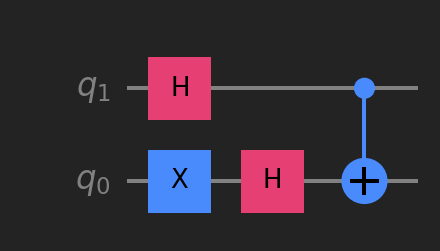

Statevectors before CX gate:


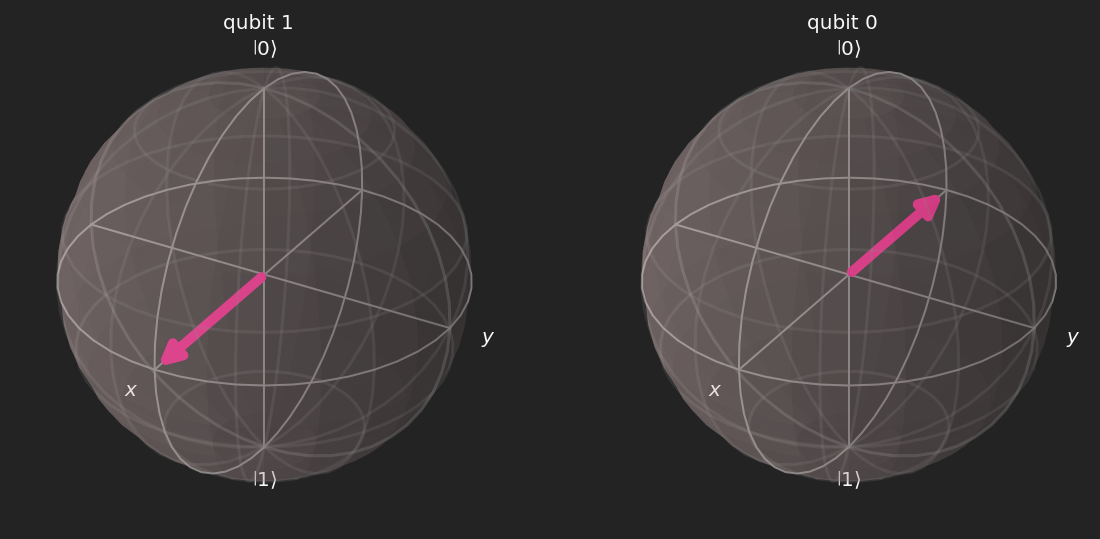

Statevectors after CX gate:


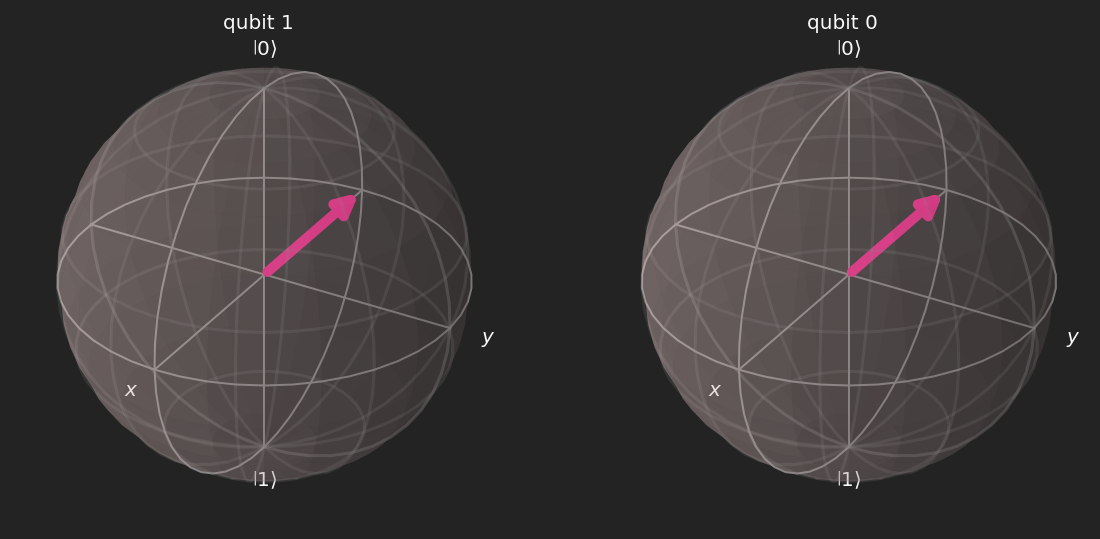

In [27]:
# Circuit to apply |+-⟩ to CX gate
qc = QuantumCircuit(2)
qc.x(0)
qc.h([0,1])
ψ_in = Statevector(qc)
qc.cx(1,0)
ψ_out = Statevector(qc)
display(qc.draw())

print('Statevectors before CX gate:')
display(ψ_in.draw('bloch', reverse_bits=True))
print('Statevectors after CX gate:')
display(ψ_out.draw('bloch', reverse_bits=True))

Notice how the vector that changes direction is the one associated with the control qubit, whereas the statevector for the target qubit remains unchanged. 

So phase kickback has allowed us to turn the undetectable eigenvalue of a unitary matrix into a measurable change in an auxiliary qubit. 

Now, since states $|+\rangle$ and $|-\rangle$ give probabilistic results when measured in the computational basis, the above analysis doesn't seem to directly show that the target qubit is in fact causing a deterministic change in the control qubit. However, recall that we can always go from the bit basis to the sign basis (and back) by applying Hadamard gates. So the full kickback protocol to show that this is the case will be:

$$ |0\rangle |1\rangle \xrightarrow{\; H \otimes H \;} |+\rangle |-\rangle \xrightarrow{\; CX \;} |-\rangle |-\rangle \xrightarrow{\;  H \otimes H \;} |1\rangle |1\rangle .$$

So, here we can effectively see how when the target qubit is $|1\rangle$, the control qubit is flipped from $|0\rangle$ to $|1\rangle$.

Let's see this in Qiskit:

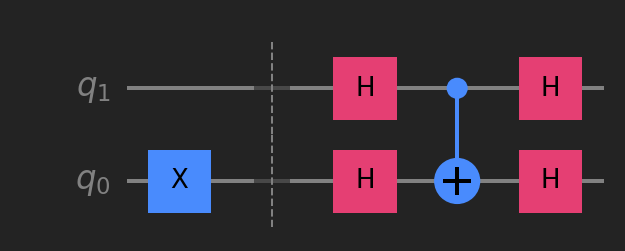

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [28]:
qc = QuantumCircuit(2)
qc.x(0)
qc.barrier()
ψ_in = Statevector(qc)
qc.h([0,1])
qc.cx(1,0)
qc.h([0,1])
ψ_out = Statevector(qc)
display(qc.draw())

# Input statevector
display(ψ_in.draw('latex',prefix='|\\psi \\rangle_{\\text{in}} = '))

# Output statevector
ψ_out.draw('latex',prefix='|\\psi \\rangle_{\\text{out}} = ')

On the surface, this seems rather innocuous. It looks like all we have accomplished is to swap the direction of a $CX$ gate. However, this concept of having a control state be modified by the target has massive implications. 

The majority of quantum algorithms consist of encoding a problem in a multi-qubit unitary $U$, and controlling $U$ with a set of qubits initialized in a superposition. This allows to **simultaneously** have the kickback effect act on every state of the superposition, causing one, or a few of them, to pick up a relative phase determined by eigenvalues of $U$. This is precisely where the parallelism that leads to quantum advantage stems from, and will become clearer as we explore different quantum algorithms.

So, to summarize, for the case in which we have a single qubit controlling a unitary $CU$, phase kickback is enabled by initializing the control qubit in an equal superposition of $|0\rangle$ and $|1\rangle$, and the target in an eigenvector $|u\rangle$ of $U$ (where $U$ can be a multi-qubit gate). After $CU$ is applied, the control qubit then picks up a relative phase equal to that of the eigenvalue $e^{i\varphi}$ of $U$:

$$ \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle \right)|u\rangle \xrightarrow{\; CU \;} \frac{1}{\sqrt{2}}\left(|0\rangle + e^{i\varphi}|1\rangle \right)|u\rangle .$$

### 3.3 Multi-Qubit Phase Kickback

We can generalize the expression above for the case in which we now have $m$ qubits controlling a $C^m U$ gate, where $U$ only gets applied to an eigenvector $|u\rangle$ in the target qubits if the control register is in some arbitrary state $|k\rangle$, with $ k \in [0,2^m]$:

$$ \frac{1}{\sqrt{2}}\left(|k\rangle^{\perp} + |k\rangle \right)|u\rangle \xrightarrow{\; C^mU \;} \frac{1}{\sqrt{2}}\left(|k\rangle^{\perp} + e^{i\varphi}|k\rangle \right)|u\rangle .$$

Here $|k\rangle^{\perp}$ is a state composed of a superposition of the basis states that **do not** activate $U$, such that $\langle k|k\rangle^{\perp} = 0$. 

To make this definition more concrete, let's look at an example where an $S$ gate gets activated when two control qubits are in state $|01\rangle$. [Recall](https://learnquantum.io/chapters/02_quantum_computing/02_03_single_qb_sys.html#the-phase-gate-family) that the matrix for an $S$ gate is given by:

$$ S = \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix} ,$$

which, as we saw before, corresponds to a $\pi/2$ (or $90 °$) rotation about the $z$ axis. Therefore, it is not hard to see that the eigenvectors of this matrix are states $|0\rangle$ and $|1\rangle$ since they are the two vectors that point in the $z, -z$ directions, respectively. To find their corresponding eigenvalues, we use the eigenvalue equation, which for $|0\rangle$ results in:

$$
\begin{aligned}
S |0\rangle &= \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\\
\\
S |0\rangle &= \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\\
\\
S |0\rangle &= |0\rangle .
\end{aligned}
$$

Similarly, for $|1\rangle$, we get:

$$
\begin{aligned}
S |1\rangle &= \begin{bmatrix} 1 & 0 \\ 0 & i \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix}
\\
\\
S |1\rangle &= \begin{bmatrix} 0 \\ i \end{bmatrix}
\\
\\
S |1\rangle &= i|1\rangle .
\end{aligned}
$$

Consequently, for the $S$ matrix, we have the following set of eigenvalue/eigenvector pairs:

$$ \big \{\big(\lambda, |u\rangle \big)\big \}_{U=S} = \big \{ \big(1,  |0\rangle \big), \big( {i}, |1\rangle \big) \big \} .$$

We can now compose a controlled-$S$ gate, which is activated only when the control state is $|k\rangle = |01\rangle$. This can be expressed as:

$$ 
\begin{aligned}
C\bar{C}S &= |k\rangle^\perp \langle k |^\perp \otimes I + |k\rangle \langle k | \otimes S 
\\
\\
C\bar{C}S &= \big(|00\rangle\langle 00|+|10\rangle\langle 10| + |11\rangle\langle 11| \big)  \otimes I + |01\rangle\langle 01| \otimes S 
\end{aligned}
$$

So, if the input control state is initialized in an equal superposition, and the target state in the eigenvector $|1\rangle$ of the $S$ gate, when the $C\bar{C}S$, phase kickback will cause state $|01\rangle$ to pick up a phase of $i$:

$$\frac{1}{2}\big(|00\rangle + |01\rangle + |10\rangle + |11\rangle \big) \otimes |1\rangle \xrightarrow{\; C\bar{C}S \;} \frac{1}{2}\big(|00\rangle + i|01\rangle + |10\rangle + |11\rangle \big)  \otimes |1\rangle. $$

This can be seen as "tagging" a state of interest, which is a critical step in algorithms like Grover's search algorithm. 

Let's see how to implement this in Qiskit:

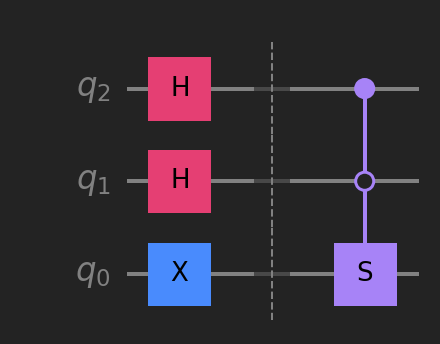

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [29]:
from qiskit.circuit.library import SGate

# create controlled S gate activated by state |01⟩
CC̄S = SGate().control(2, ctrl_state='01')

qc = QuantumCircuit(3)
qc.h([2,1])              # Initialize control in equal superposition
qc.x(0)                  # Initialize target in eigenvector |1⟩ of S gate
qc.barrier()
qψ_in = Statevector(qc)   # Save input state
qc.append(CC̄S, [2,1,0])  # Append CC̄S gate
ψ_out = Statevector(qc)  # Save output state
display(qc.draw())

# Input statevector
display(ψ_in.draw('latex',prefix='|\\psi \\rangle_{\\text{in}} = '))

# Output statevector
ψ_out.draw('latex',prefix='|\\psi \\rangle_{\\text{out}} = ')

## 4. Quantum Function Evaluation

In the section on [Boolean logic](https://learnquantum.io/chapters/01_classical_computing/01_01_bits_and_circuits.html#boolean-logic) we introduced the idea that any logical statement can be composed using three basic operations: **NOT**, **AND**, **OR**. For example, we one could define something like a majority operation **MAJ**, that maps three input bits $a, b, c$, to an output which equals $1$ if the majority of the inputs are $1$, and $0$ otherwise. There is then a Boolean expression for this operation given by:

$$\text{MAJ}(a, b, c) = (a \land b) \lor (a \land c) \lor (b \land c) .$$

A logical statement like the one above is in essence a function $f$ that maps a $n$-bit input $x \in \{0, 1\}^n$ (commonly referred as a bitstring), to a single-bit output $ f(x) \in \{0, 1\}$. This is commonly expressed as:

$$ f: \{0, 1\}^n \longmapsto \{0, 1\} .$$

An issue we discussed before, is that functions like these are in general not reversible. So we need to find a way to encode them in the form of a quantum circuit.

### 4.1 Boolean Functions as Quantum Circuits

A general strategy to map a classical function $f(x)$ like the ones described above into the quantum circuit model is to follow the [same approach](https://learnquantum.io/chapters/01_classical_computing/01_02_reversible_computing.html#reversible-and) we used to make an **AND** gate reversible: pass all inputs $|x\rangle$ to the output, and add an auxiliary qubit $|y\rangle$ whose output depends on the value of $x$ evaluated as a function $f(x)$:

<img src="images/02_05_01_q_eval.png" align = "center" width="700"/>

In other words, given a state $|x\rangle \otimes |y\rangle$, we can construct a unitary $U_f$ that encodes a classical function $f(x)$, such that:

$$|x\rangle \otimes \ |y\rangle \xrightarrow{\; U_f \;} |x\rangle \otimes |y \oplus f(x)\rangle, $$

where $\oplus$ represents addition modulo 2. Now, since $y$ can be either $0$ or $1$, we have two scenarios:

1. If $y = 0$, $|y \oplus f(x)\rangle = |f(x)\rangle$, because adding $0$ to $f(x)$ simply results in having just $f(x)$.
2. If $y = 1$, $|y \oplus f(x)\rangle = |\overline{f(x)}\rangle$ (negated version of $f(x)$), because adding $1$ to a single bit flips its value.

Let's consider as an example the case of a 3-qubit reversible **AND** gate. We know that the classical version of such function is given by:

$$ f(x) = x_2 \land x_1 \land x_0, $$

which can be implemented as a quantum circuit using a multi-control $X$ gate, with the control qubits serving as the function input $|x\rangle$, and the target qubit as the auxiliary $|y\rangle$. Let's implement this in Qiskit:

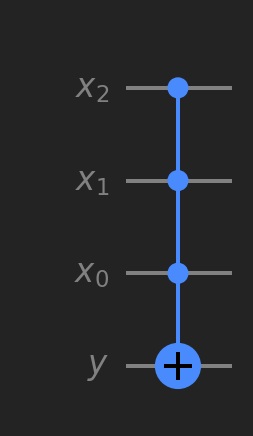

In [30]:
from qiskit import QuantumRegister

n = 3
qr_x = QuantumRegister(n, name='x')
qr_y = QuantumRegister(1, name='y')

# Implement reversible 3-qubit AND
qc_and3 = QuantumCircuit(qr_y, qr_x)
qc_and3.mcx(qr_x,qr_y)
qc_and3.draw()

If we now test all possible inputs $|x\rangle \in \{|0\rangle, |1\rangle\}^{\otimes 3}$, with the bottom qubit  initialized as $|y\rangle = |0\rangle$, we can see that the output qubit (least significant qubit) will be equal to $|f(x)\rangle$, with $f(x)$ being the classical **AND** function:

In [31]:
# Function to print |x⟩|y⟩→|x⟩|y⊕f(x)⟩ for all combinations of |x⟩
def print_func_eval(n, y, qc):
    from IPython.display import Math
    
    pre_in = '|x\\rangle \otimes |y \\rangle'
    pre_out = '|x\\rangle \otimes |y \\oplus f(x) \\rangle'
    display(Math(pre_in+'\\xrightarrow{\; U_f \;}'+pre_out))
    
    for i in range(2**n):
        x = Statevector.from_label(np.binary_repr(i,n))
        in_str = x.draw('latex_source')+'\otimes'+y.draw('latex_source')

        ψ_in = x.tensor(y)
        ψ_out = ψ_in.evolve(qc)
        out_str = ψ_out.draw('latex_source')[1:n+2]+'\\rangle \\otimes |'+ψ_out.draw('latex_source')[n+2:]

        display(Math(in_str+'\\longrightarrow'+out_str))

In [32]:
# Test Uf gate for all possible |x⟩ inputs with |y⟩=|0⟩:
y = Statevector.from_label('0')
print_func_eval(n, y, qc_and3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

But if now we initialized $|y\rangle$ in state $|1\rangle$, we can see that the output qubit will be equal to $|\overline{f(x)}\rangle;$ i.e., we will get the equivalent of a **NAND** function:

In [33]:
# Test Uf for all possible |x⟩ inputs with |y⟩=|1⟩:
y = Statevector.from_label('1')
print_func_eval(n, y, qc_and3)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The key ingredient of many quantum algorithms, is to combine this quantum function evaluation primitive with the phase kickback effect; so let's explore how this can be done.

### 4.2 Function-Dependent Kickback

Once again, let's consider a unitary $U_f$ that encodes a Boolean function $f(x)$, but where we initialize the auxiliary qubit $|y\rangle$ in state $|-\rangle$, such that our input state is given by:

$$
\begin{aligned}
|x\rangle \otimes |y\rangle &= |x\rangle \otimes |-\rangle
\\
\\
|x\rangle \otimes |y\rangle &= |x\rangle \otimes \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
\\
\\
|x\rangle \otimes |y\rangle &= \frac{1}{\sqrt{2}}(|x\rangle |0\rangle - |x\rangle |1\rangle)
\end{aligned}
$$

Recalling that $U_f$ performs the following mapping:

$$ 
|x\rangle \otimes |y\rangle \xrightarrow{\; Uf \;} |x\rangle \otimes |y \oplus f(x) \rangle, 
$$

for the input state described above, we then have:

$$\frac{1}{\sqrt{2}}(|x\rangle |0\rangle - |x\rangle |1\rangle) \xrightarrow{\; Uf \;} \frac{1}{\sqrt{2}}(|x\rangle |f(x) \rangle - |x\rangle |\overline{f(x)} \rangle) .$$

Now, since $f(x)$ can only take one of two values, we have two scenarios:

1. If $f(x) = 0$, the output is given by: $\frac{1}{\sqrt{2}}(|x\rangle |0 \rangle - |x\rangle |1\rangle) = |x\rangle|-\rangle.$
2. If $f(x) = 1$, the output is given by: $\frac{1}{\sqrt{2}}(|x\rangle |1 \rangle - |x\rangle |0\rangle) = -|x\rangle|-\rangle.$

In other words, we either have the output being equal to the input when $f(x) = 0$, or the output picking up a global phase of $-1$ if $f(x) = 1$. This, again, is the phase kickback effect in action, but where the phase factor now depends on the outcome of the function $f(x)$. We can write the result above more compactly as:

$$|x\rangle \otimes |-\rangle \xrightarrow{\; Uf \;} (-1)^{f(x)}|x\rangle |-\rangle .$$

The reason why we see kickback here is because, the way the unitary $U_f$ is constructed, is such that, the gate being applied on the auxiliary register is the $X$ gate, which as we know has state $|-\rangle$ as an eigenvector with eigenvalue of $-1$. 

The idea is then to have $|x\rangle$ prepared as some sort of superpositon, so that the global phase $(-1)^{f(x)}$ turns into a relative phase that marks those values of $x$ that satisfy the condition of $f(x) = 1$.

For now, let's go back to our example where $f(x)$ is a 3-qubit **AND** gate, which we know only produces an output equal to $|1\rangle$ if the input is $|111\rangle .$ Therefore, if we prepare $|x\rangle$ in a equal superposition, and $|y\rangle$ is state $|-\rangle$, we should see state $|111\rangle $ picking up a phase of $-1$ at the output of $U_f$:

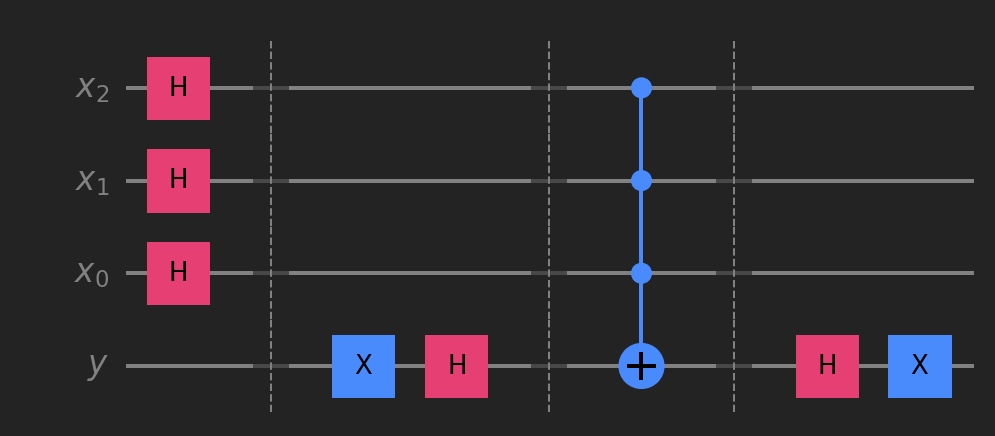

<IPython.core.display.Latex object>

In [34]:
qc_f = QuantumCircuit(qr_y, qr_x)

# Prepare |x⟩ in equal superposition
qc_f.h(qr_x)
qc_f.barrier()

# Initialize |y⟩ in state |-⟩
qc_f.x(qr_y)
qc_f.h(qr_y)
qc_f.barrier()

# Apply 3-qubit AND gate
qc_f.mcx(qr_x, qr_y)
qc_f.barrier()

# Take |y⟩ back to state |0⟩
qc_f.h(qr_y)
qc_f.x(qr_y)
ψ_out = Statevector(qc_f)
display(qc_f.draw())

# Output statevector
ψ_out.draw('latex',prefix='|\\psi \\rangle_{\\text{out}} = ')

As we can see, only the state $|x\rangle = |111\rangle$, which corresponds to $f(x) = 1$ for an **AND** gate picks up a phase of $-1$.

Now, if it is not entirely clear why we would want to "tag" a state based on the output of a function, don't worry, we will see why this matters in the chapter on quantum algorithms, where this primitive will be used extensively. 